## Customer Analytic:

### INTRODUCTION

### A good understanding of  customers is extremely important for running a successful business.

### KYC (Know Your Customer) is what makes all the difference for many companies. 

### KYC helps businesses do their best in creating, communicating and delivering their offerings by

### tailoring them to their customer's needs. That is why Customer Analytic is the most important part

### of both Marketing Analytics and the Marketing function of a company in general.

### Customer Analytic seeks to understand customer's behavior and numerous performance 

### outcome indicators. 


### SCOPE:

### Although there are broad characterics to consider in Consumer Analytics, it is however

### more logical to focus on one of the fundamental marketing frameworks - Segmentation, Targeting

### and positioning known as the STP Framework. This Framework is chosen because it applies to all areas  

### of business and marketing activity. However, in this notebook I dived into Customer Segmentation. 

### My second notebook will dive into Positioning as, those two would help to determine the targeting.


### DATA SOURCE

### The dataset  I used is a B2C business model. They are gotten from individual people that shoped in a 

### a certain Supermarket(name withheld). A Supermarket is a perfect datapoint from a data science 

### Customer Analytic point because different kinds of people makr their purchase on a daily basis, 

### therefore there is lots of varaible data available.



### I hope you enjoy the analysis. Attached are comments for clarifications when need be.
###### theink.oe@gmail.com



# Libraries



In [1]:
import pandas as pd
import numpy as np
import scipy 

import matplotlib as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

In [2]:
df_segmentation = pd.read_csv('segmentation_data.csv', index_col=0)

# Eploring the Data

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


# Descriptive Statistics about the Columns

In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
# In the above we got the:

# Count: The count row show there are 2000 observations in our dataset

# Mean: For age and Income which are the continous variables in the dataset we see the average age as 35.9 approximately 36years and average income=120,954 approximately 121,000 dollars. The means of the categorical  values are not showing very much since those values are comprised of binariy numbers. So the mean shows just the proportions of 1s. Eg Sex: 0 means Male and 1 means Female so the proportion male to females is about 46%.

# It is important at the stage to explore how the variables in our dataset correlate, so lets see the Correlation Estimate

In [6]:
# Correlation Estimate by using Pearson Correlation Method

# Correlation defines the linear dependency between variables. It ranges from -1 to +1.

# +1 indicates very strong correlation, -1 stands for negative correlation and 0 shows no linear dependence between the two variables 

In [7]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [8]:
## The first Diagonal values starting from sex shows that these values are correlated, thats why they are 1 throughout. The matrix is symetrical. The entries above and below the diagonal are image mirror of themselves. We can quickly see the following correlation:

### The correlation function shows there is a strong correlation between Age and Education at 0.65 which confirms that older people seem to be more educated

### Income and Occupation has a correlation of 0.68 which may suffice to say that having a larger income translates that living in a higher housing/neighbourhood.

#### Let see the Visualization with a Heatmap

## Visualize Correlation Data

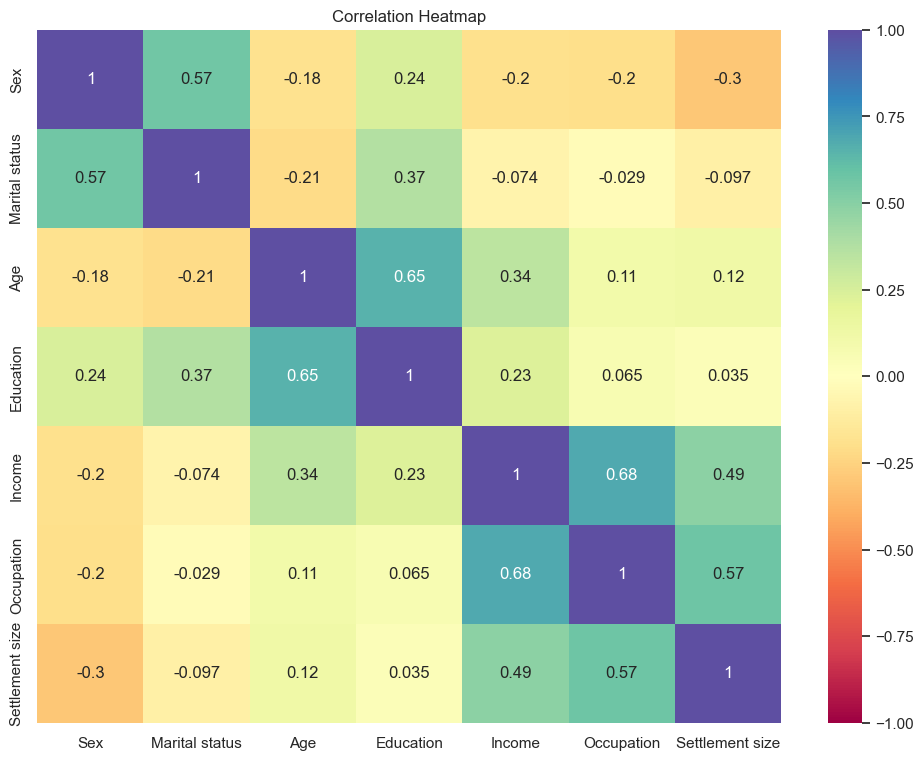

In [9]:
plt.pyplot.figure(figsize =(12,9))
s = sns.heatmap(df_segmentation.corr(), annot = True, cmap ="Spectral", vmin = -1, vmax = 1)
plt.pyplot.title("Correlation Heatmap")
plt.pyplot.show()

In [10]:
##  The Heatmap shows that the bluer the sqaures between two variables the higher the positive correlation is between them while the reder the squares the higher the negative correlation between them.

### With the Heatmap we can see the strong corelation between Age and Education as both are 0.65, also there is a strong corelation between Income and Occupation of the Customers. Also positive correlation between occupation and settlement size

## Visualize with Scatter Plot

Text(0.5, 1.0, 'Visualization of Raw Data')

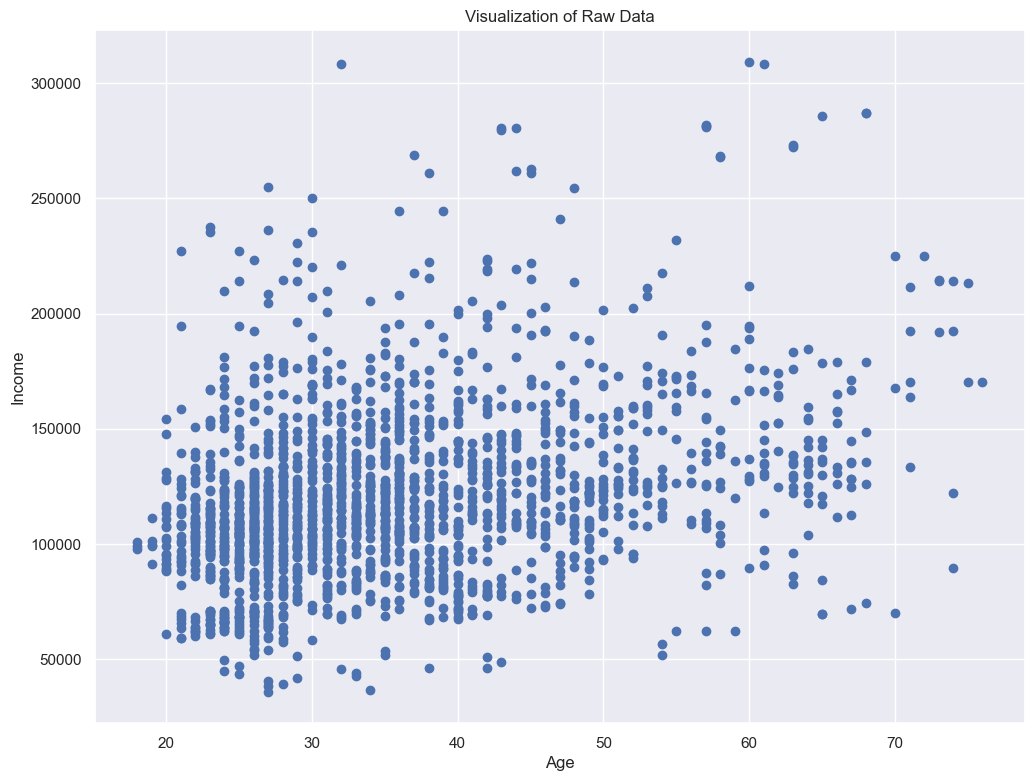

In [11]:
plt.pyplot.figure(figsize =(12,9))
plt.pyplot.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:,4])
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Income")
plt.pyplot.title("Visualization of Raw Data")

### Preprocessing Through Standardization of our Dataset

In [12]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Segmentation Model

### 1. Hierarchical Clustering

In [13]:
heir_clust = linkage(segmentation_std, method = "ward")

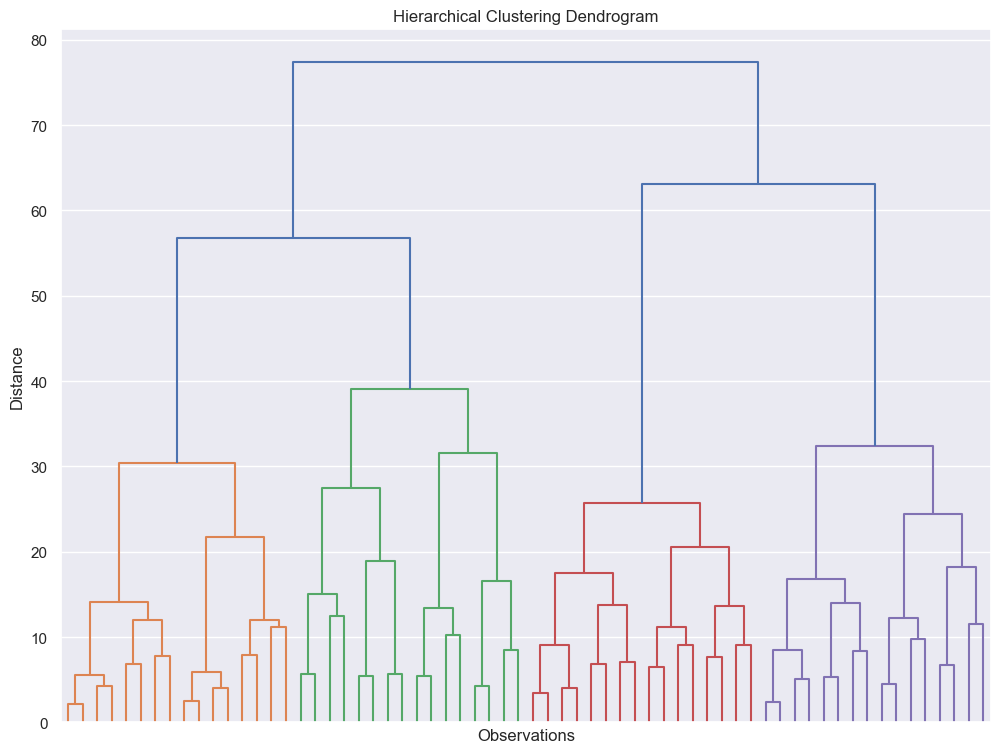

In [14]:
plt.pyplot.figure(figsize =(12,9))
plt.pyplot.title("Hierarchical Clustering Dendrogram")
plt.pyplot.xlabel("Observations")
plt.pyplot.ylabel("Distance")
dendrogram(heir_clust,
           truncate_mode = "level",
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
           #color_threshold = 0)
plt.pyplot.show()

In [15]:
### At the base of our dendrogram is 2000 observations and our goal of our clustering algorithm is to group them together based on their distances which are the Y axis represented by the vertical lines. So the samller the distance between the point, the further down the tree they will be grouped together showing that they are more similar with one another. 

### Note how different colors shows different clusters. Making a total of 4 cluster. Both then the right cluster for our analysis need to be found

## K-means Clustering

In [16]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

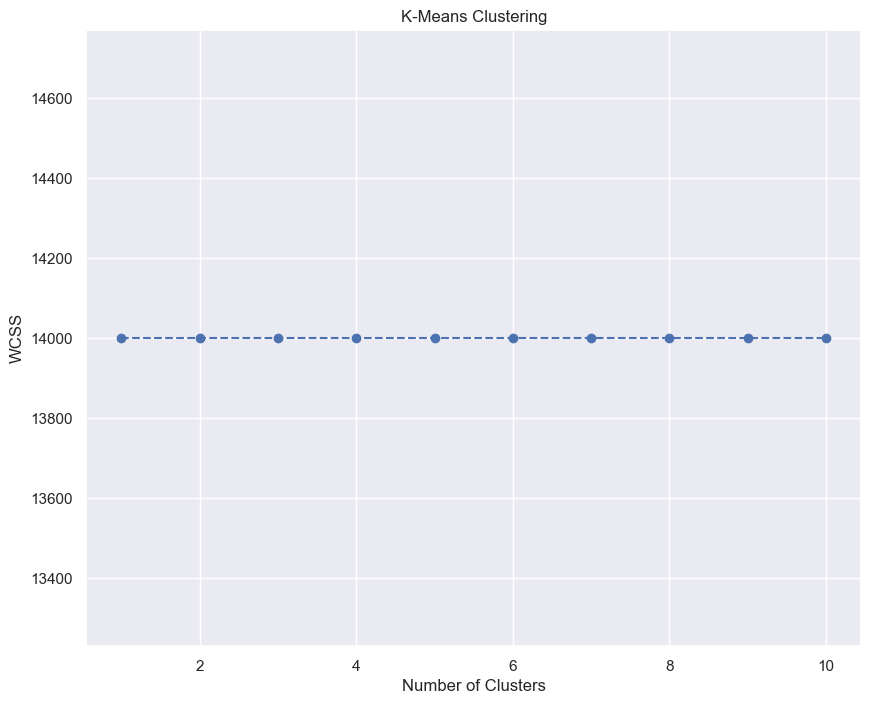

In [17]:
plt.pyplot.figure(figsize =(10,8))
plt.pyplot.plot(range (1,11), wcss, marker ='o', linestyle ='--')
plt.pyplot.title("K-Means Clustering")
plt.pyplot.xlabel("Number of Clusters")
plt.pyplot.ylabel("WCSS")

plt.pyplot.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [19]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

# Result

In [20]:
df_segm_kmeans =df_segmentation.copy()
df_segm_kmeans["Segment K-means"] = kmeans.labels_

In [21]:
df_segm_analysis = df_segm_kmeans.groupby(["Segment K-means"]).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [22]:
### The average age and education of the first row (index 0) are 56yrs & 2.1 respectively. This shows they are admenced people with more eduction and high income staying at good neighbourhood/city. So I called them Well-Off, the second segment/row have low education and thus low income, low occupation and dell in low area as shown by the figures, so I give them Fewer-Opportunity, 3rd row are average but in age and everything else so I give them Average/Standard. The last row are high income, high in occupation and settlement size. So they can be regarded as Carrer-Focused people 

In [23]:
df_segm_analysis["No-Obs"] = df_segm_kmeans[["Segment K-means", "Sex"]].groupby(["Segment K-means"]).count()

In [24]:
df_segm_analysis["Prop-Obs"] = df_segm_analysis ["No-Obs"] / df_segm_analysis ["No-Obs"].sum()

In [25]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No-Obs,Prop-Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [26]:
df_segm_analysis.rename({0:"Well-Off", 1:"Fewer-Opportunities", 2: "Average/Standard", 3:"Career-Focused"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No-Obs,Prop-Obs
Segment K-means,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer-Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Average/Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career-Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [27]:
df_segm_kmeans ["Labels"] = df_segm_kmeans["Segment K-means"].map({0:"Well-Off", 
                                                                   1:"Fewer-Opportunities", 
                                                                   2: "Average/Standard", 
                                                                   3:"Career-Focused"})

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


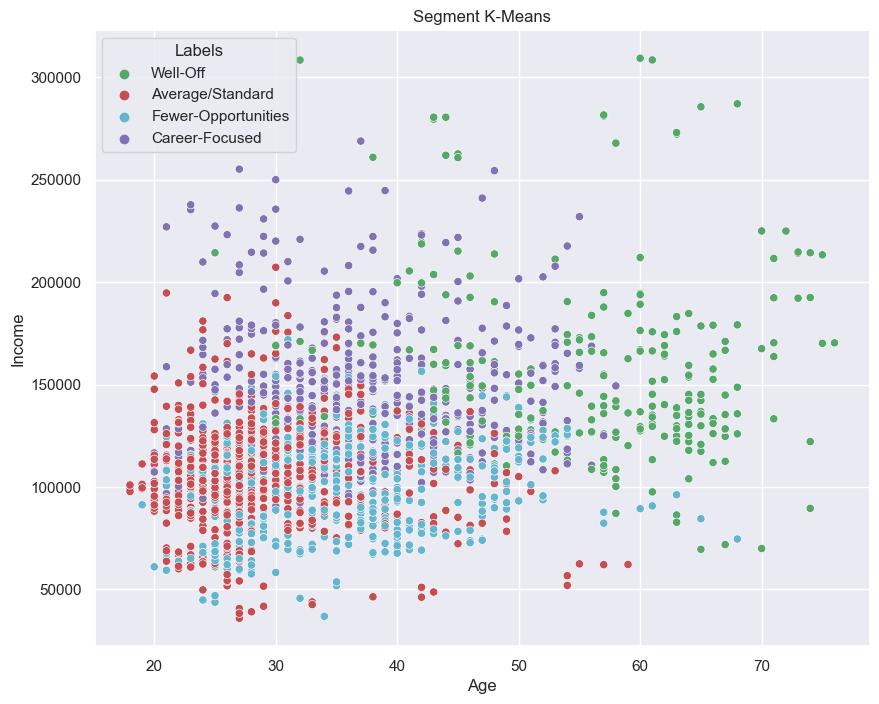

In [28]:
x_axis = df_segm_kmeans ["Age"]
y_axis = df_segm_kmeans ["Income"]
plt.pyplot.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans["Labels"], palette = ["g", "r", "c", "m"])
plt.pyplot.title("Segment K-Means")
plt.pyplot.show()

In [70]:
### The green sections are well separated but the others Kmeans  segment are not clearly, so I use Pricipal Component Analysis -PCA next

## PCA

In [29]:
pca = PCA()

In [30]:
pca.fit(segmentation_std)

PCA()

In [31]:
pca.explained_variance_ratio_ #the seven of this pcas explained 100% of the variability of the data. 
#Thats why if  you sum all the number you see, you will get 1. The first compornent explained only 36% of the 
#variable of the data, the second 26%, the 3rd 19% and so on. I will then proceed to select the subset component will preserving 
#variance


array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

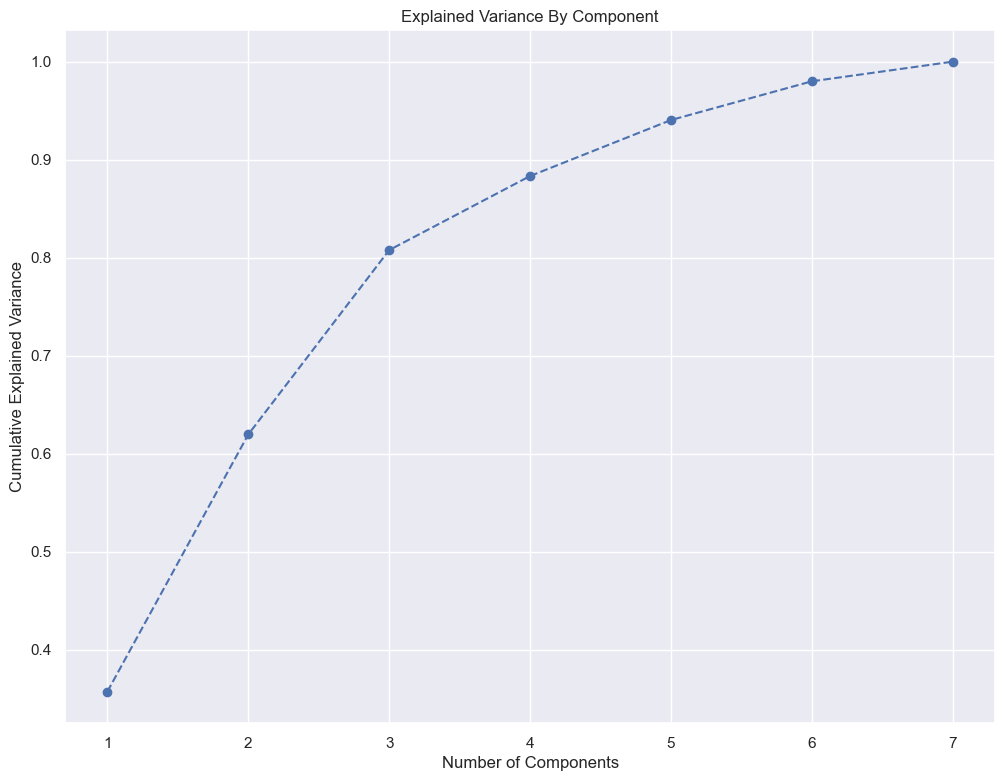

In [32]:
plt.pyplot.figure(figsize =(12,9))
plt.pyplot.plot(range (1,8), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.pyplot.title("Explained Variance By Component")
plt.pyplot.xlabel("Number of Components")
plt.pyplot.ylabel("Cumulative Explained Variance")

plt.pyplot.show()

In [33]:
# To use only 3 component
pca = PCA(n_components = 3)

In [34]:
pca.fit(segmentation_std)

PCA(n_components=3)

## PCA Results

In [35]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [36]:
# the result is a 3x7 pca because I reduced my component to 3 from the original 7. I will assign Component 1, 2, 3 to the array


In [37]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ["Component 1", "Component 2","Component 3"])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


## Visualize Data

([<matplotlib.axis.YTick at 0x2513bc91130>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

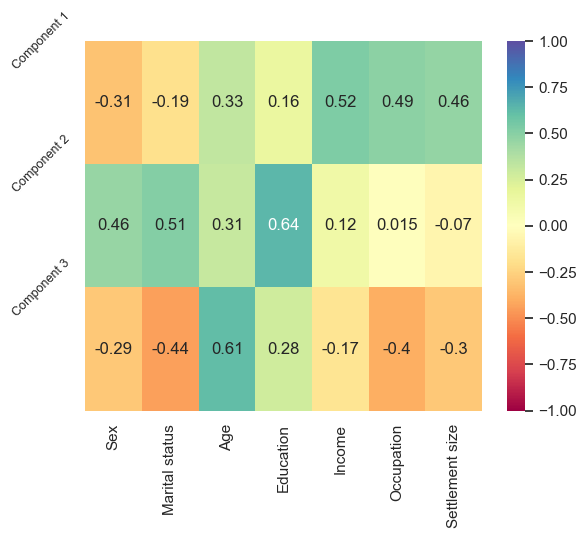

In [38]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = "Spectral",
           annot = True)
plt.pyplot.yticks([0, 1, 2],
                ["Component 1", "Component 2","Component 3"],
                 rotation = 45,
                 fontsize = 9)

In [39]:
# The Component 1 of the heatmap shows there's a positive corelation between Age, Education, Income, Ocupation & Settlement size. 
#These relates strictly to the career of a person. It shows the career-focus of an individual
# On the second component, it shows that Sex, Marital Status and Education as the most prominent determinant. All career related 
#features are uncorrelated with it. This component doesnt refer to career but andividual's Education and lifestyle
# On component 3, it shows that Age, Marital Status and Occupation as the most prominent component.
#Here marital status and occupant showed negative but they are still important. The three important component in this last one
#indicates the amount of experience a person has irrespect lo work or life Experience

In [40]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [41]:
#This  new variables shows the 3 components on the columns. They are called pca scores. So i Can proceed to save them 

In [42]:
scores_pca = pca.transform(segmentation_std)

## PCA for 4 components

In [43]:
pca2 = PCA(n_components = 4)

In [44]:
pca2.fit(segmentation_std)

PCA(n_components=4)

## PCA Result

In [45]:
pca2.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [46]:
df_pca2_comp = pd.DataFrame(data = pca2.components_,
                          columns = df_segmentation.columns.values,
                          index = ["Component 1", "Component 2","Component 3", "Component 4"])
df_pca2_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


## Visualize Data

([<matplotlib.axis.YTick at 0x2513bce7790>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

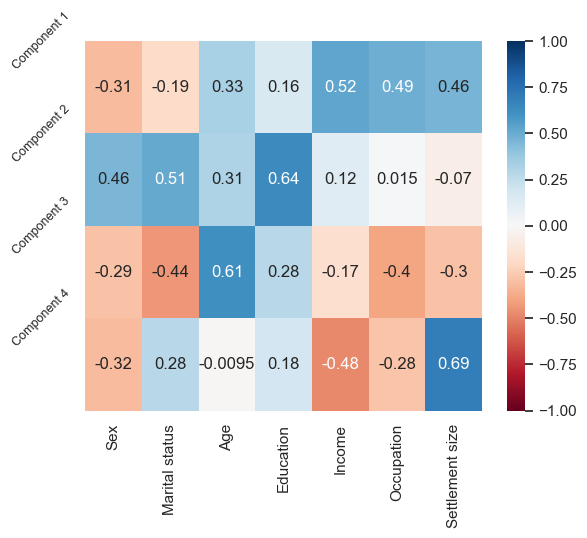

In [47]:
sns.heatmap(df_pca2_comp,
           vmin = -1,
           vmax = 1,
           cmap = "RdBu",
           annot = True)
plt.pyplot.yticks([0, 1, 2, 3],
                ["Component 1", "Component 2","Component 3", "Component 4"],
                 rotation = 45,
                 fontsize = 9)

In [48]:
# There's no much difference with what we observed in using 3 components

In [49]:
pca2.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [50]:
scores_pca2 = pca2.transform(segmentation_std)

## K-means Clustering with PCA

In [51]:
wcss = []
for i in range (1, 11):
    kmeans_pca = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

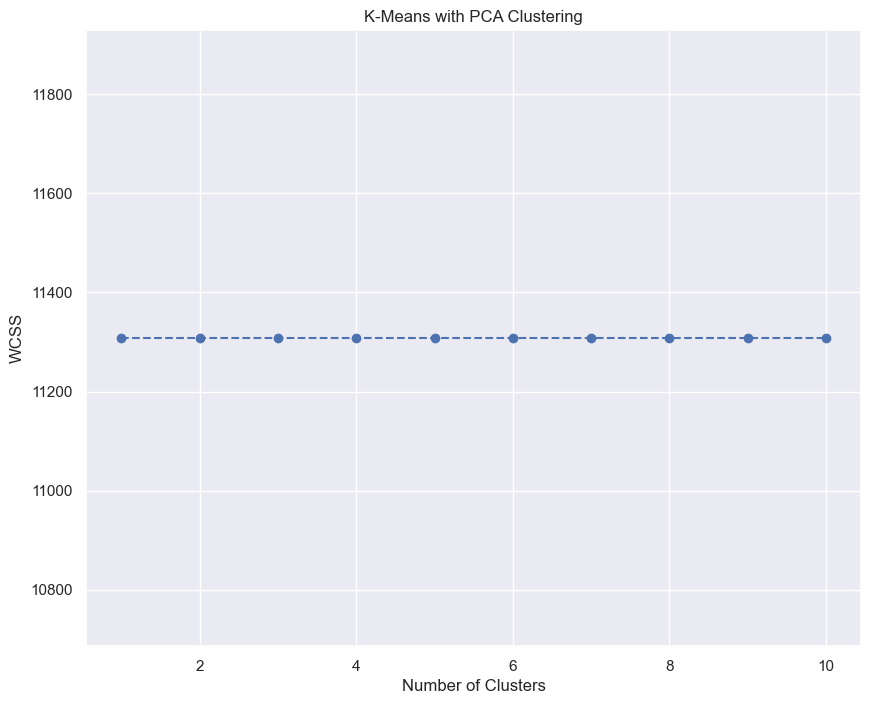

In [52]:
plt.pyplot.figure(figsize =(10,8))
plt.pyplot.plot(range (1,11), wcss, marker ='o', linestyle ='--')
plt.pyplot.xlabel("Number of Clusters")
plt.pyplot.ylabel("WCSS")
plt.pyplot.title("K-Means with PCA Clustering")

plt.pyplot.show()



In [53]:
kmeans_pca = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)

In [54]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-means clustering with PCA Results

In [55]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ["Component 1", "Component 2", "Component 3"]
df_segm_pca_kmeans["Segment K-means PCA"] = kmeans_pca.labels_

In [56]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [57]:
#To calculate the mean values per cluster

In [58]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(["Segment K-means PCA"]).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [59]:
# Segment 3 is highest on all three components, Career, Education & Lifestyle and Experience. We can easily establish that
# this is the #WELL-OFF segment
# Segment 2 is low on Career, Education&Lifestyle components but high on Experience. This is the #FEWER-OPPORTUNITY CLUSTER
# Segment 1 showshigh values Career but low on Education/Lifestyle and Experience, This is the #CAREER-FOCUSED Segment
# Segment 0 is our youngest cluster with low on career and Experience but realtively high on Education. This is our #AVERAGE/STANDARD CLUSTER


In [60]:
# TO see how many people belonged to each cluster

In [61]:
df_segm_pca_kmeans_freq["No-Obs"] = df_segm_pca_kmeans[["Segment K-means PCA", "Sex"]].groupby(["Segment K-means PCA"]).count()
df_segm_pca_kmeans_freq["Prop-Obs"] = df_segm_pca_kmeans_freq ["No-Obs"] / df_segm_pca_kmeans_freq ["No-Obs"].sum()
df_segm_pca_kmeans_freq =df_segm_pca_kmeans_freq.rename({0:"Average/Standard", 
                                                         1:"Career-Focused", 
                                                         2:"Fewer-Opportunities", 
                                                         3: "Well-Off"})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,No-Obs,Prop-Obs
Segment K-means PCA,,,,,,,,,,,,
Average/Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career-Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
Fewer-Opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Well-Off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [62]:
# The highest segment with 692 people(35% of the total number) is the #AVERAGE/STANDARD People
# Career- Focused group is the second highest with 583 people(29% of the total)
# Fewer-Opportunities are the 3rd highest with 460 people(ie 23% of the total)
# While the Well-OFF  are the last with just 265 number of people (13% of the total)

In [63]:
df_segm_pca_kmeans["Legend"] = df_segm_pca_kmeans ["Segment K-means PCA"].map({0:"Average/Standard", 
                                                         1:"Career-Focused", 
                                                         2:"Fewer-Opportunities", 
                                                         3: "Well-Off"})

## Data Visualization

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


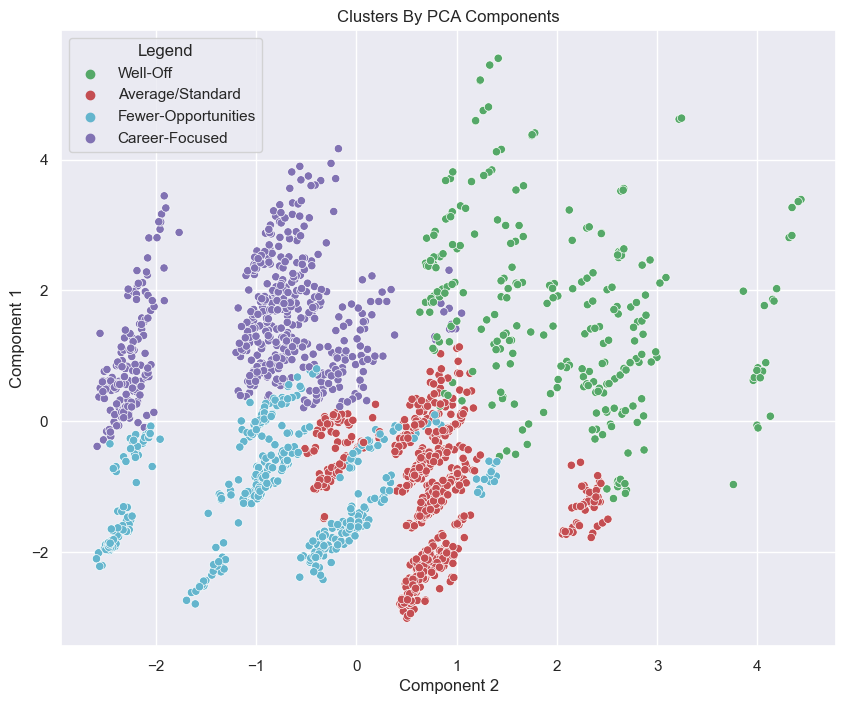

In [64]:
x = df_segm_pca_kmeans["Component 2"]
y = df_segm_pca_kmeans["Component 1"]
plt.pyplot.figure(figsize = (10, 8))
sns.scatterplot(x, y, hue= df_segm_pca_kmeans["Legend"], palette = ["g", "r", "c","m"])
plt.pyplot.title("Clusters By PCA Components")
plt.pyplot.show()

In [65]:
# In comparison to the scatterplot with kmeans earlier shown, the pca scatter plot helps us to quickly observe the separate clusters
# The green area shows the Well-Off Segment
# The purple segment is the Career-Focused while Red and Blue represents the Average/Standard and Fewer-Opportunity Segment respectively

In [66]:
# At this level, I have successfully segmented the data. I will hereby save my model so i can use them in the next stage of the Analysis.

## Data Export

In [67]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [68]:
pickle.dump(pca, open("pca.pickle", "wb"))

In [69]:
pickle.dump(kmeans_pca, open("kmeans_pca.pickle", "wb"))